In [1]:
%matplotlib inline
from matplotlib import pyplot
import math
import numpy
import pandas

In [2]:
hetero=False
inputfile1="spec.csv"

#hetero=True
#inputfile1="spec1.csv"
#inputfile2="spec2.csv"

left_large=True
dynamic=True
num_contour=16

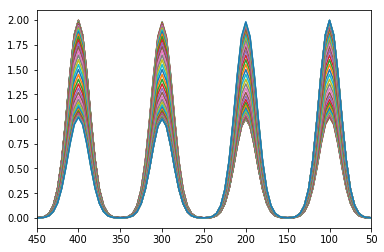

In [3]:
# file read
spec1=pandas.read_csv(inputfile1,header=0,index_col=0).T
if hetero==False:
 inputfile2=inputfile1
spec2=pandas.read_csv(inputfile2,header=0,index_col=0).T
if len(spec1)!=len(spec2):
 raise Exception('data mismatching')
spec1.T.plot(legend=None)
if left_large==True:
 pyplot.xlim(max(spec1.columns),min(spec1.columns))
if hetero==True:
 spec2.T.plot(legend=None)
 if left_large==True:
  pyplot.xlim(max(spec2.columns),min(spec2.columns))
if dynamic:
 spec1=spec1-spec1.mean()
 spec2=spec2-spec2.mean()

In [4]:
def contourplot(spec):
 x=spec.columns[0:].astype(float)
 y=spec.index[0:].astype(float)
 z=spec.values
 zmax=numpy.absolute(z).max()
 pyplot.figure(figsize=(4,4))
 pyplot.contour(x,y,z,num_contour,cmap='bwr',vmin=-1*zmax,vmax=zmax)
 #pyplot.pcolormesh(x,y,z,cmap='jet',vmin=-1*zmax,vmax=zmax)
 if left_large==True:
  pyplot.xlim(max(x),min(x))
  pyplot.ylim(max(y),min(y))

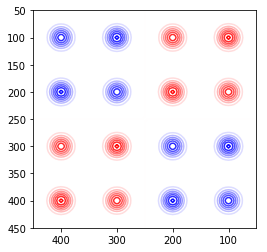

In [5]:
# synchronous correlation
sync=pandas.DataFrame(spec1.values.T@spec2.values/(len(spec1)-1))
sync.index=spec1.columns
sync.columns=spec2.columns
sync=sync.T
contourplot(sync)
#sync.to_csv(inputfile1[:len(inputfile1)-4]+'_sync.csv')

In [6]:
# Hilbert-Noda transformation matrix
noda=numpy.zeros((len(spec1),len(spec1)))
for i in range(len(spec1)):
 for j in range(len(spec1)):
  if i!=j:
   noda[i,j]=1/math.pi/(j-i)

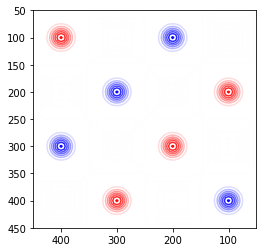

In [7]:
# asynchronouse correlation
asyn=pandas.DataFrame(spec1.values.T@noda@spec2.values/(len(spec1)-1))
asyn.index=spec1.columns
asyn.columns=spec2.columns
asyn=asyn.T
contourplot(asyn)
#asyn.to_csv(inputfile1[:len(inputfile1)-4]+'_async.csv')